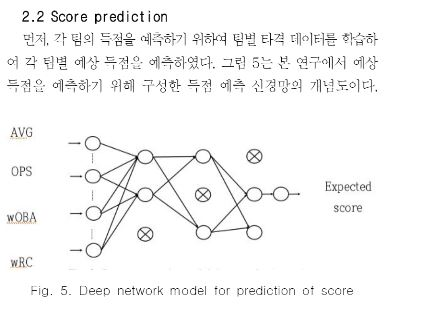

In [2]:
from IPython.display import Image

Image("img/2_2.jpg") 

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings(action='ignore')

PATH = "C:/Users/KimMinyoung/Desktop/빅콘git/data/total/"

In [4]:
hiter16 = pd.read_csv(PATH+"2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2016.csv")
pitcher16 = pd.read_csv(PATH+"2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2016.csv")

In [5]:
hiter16.head()

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,PA,AB,RBI,RUN,...,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN
0,20160401HHLG0,20160401,LG,HH,0,B,47,42,4,5,...,4,0,0,11,0,0,8,0.333333,12,4
1,20160401HHLG0,20160401,HH,LG,0,T,52,46,4,4,...,3,0,0,10,1,2,12,0.200000,15,3
2,20160401HTNC0,20160401,NC,HT,0,B,36,30,5,5,...,5,0,0,9,1,1,7,0.142857,7,1
3,20160401HTNC0,20160401,HT,NC,0,T,38,34,3,4,...,3,0,1,10,1,0,7,0.100000,10,1
4,20160401KTSK0,20160401,SK,KT,0,B,36,36,4,4,...,0,0,0,7,1,1,5,0.375000,8,3


In [6]:
hiter16.columns

Index(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'PA', 'AB',
       'RBI', 'RUN', 'HIT', 'H2', 'H3', 'HR', 'SB', 'CS', 'SH', 'SF', 'BB',
       'IB', 'HP', 'KK', 'GD', 'ERR', 'LOB', 'P_HRA_RT', 'P_AB_CN',
       'P_HIT_CN'],
      dtype='object')

## 1. AVG

In [7]:
hiter16['AVG']= hiter16['HIT']/hiter16['AB']

## 2. OPS

In [8]:
#2. OPS = 출루율 + 장타율
# 출루율
hiter16['OBP'] =(hiter16['HIT']+hiter16['BB']+hiter16['HP'])/(hiter16['AB']+hiter16['BB']+hiter16['HP']+hiter16['SF'])

In [9]:
# 장타율
hiter16['SLG'] = (hiter16['HIT']+hiter16['H2']+2*hiter16['H3']+3*hiter16['HR'])/hiter16['AB']

In [10]:
# OPS 
hiter16['OPS']=hiter16['AVG']+hiter16['OBP']

## 3. wOBA 

In [11]:
#3. wOBA= [{(볼넷-고의4구)x0.7}+(몸에 맞는 볼 x 0.73)+(1루타x0.89)+
#(2루타x1.27)+(3루타 x 1.61)+(홈런x2.07)+(도루x0.25)+(도실x0.5)](타석-고의4구)
hiter16['H1']=hiter16['HIT']-(hiter16['H2']+hiter16['H3']+hiter16['HR'])
hiter16['wOBA']= (((hiter16['BB']-hiter16['IB'])*0.7) + (hiter16['HP']*0.73)+ (hiter16['H1']*0.89)+(hiter16['H2']*1.27)+(hiter16['H3']*1.61)+(hiter16['HR']*2.07)+(hiter16['SB']*0.25)+(hiter16['CS']*0.5))/(hiter16['AB']-hiter16['IB'])

## 4. wRC 

In [13]:
#4. wRC = {((wOBA - 리그평균wOBA) / wOBA Scale) + (리그득점/리그타석)} * 타석
wOBA_scale = 1.1 # 얘는 임의로 설정하는건가?
sum_df = hiter16.sum()
rpa = sum_df['RUN'] / sum_df['AB']
hiter16['wRC'] =  ((hiter16['wOBA']-np.mean(hiter16['wOBA']))/wOBA_scale)+rpa*hiter16['AB']

In [14]:
hiter_df = hiter16[['GDAY_DS','T_ID','VS_T_ID','AVG','OPS','wOBA','wRC','RUN']]

In [15]:
hiter_df.head()

,GDAY_DS,T_ID,VS_T_ID,AVG,OPS,wOBA,wRC,RUN
0,20160401,LG,HH,0.214286,0.496894,0.327381,6.673184,5
1,20160401,HH,LG,0.282609,0.609139,0.313696,7.303066,4
2,20160401,NC,HT,0.300000,0.700000,0.487667,4.891930,5
3,20160401,HT,NC,0.235294,0.551084,0.360882,5.418994,4
4,20160401,SK,KT,0.277778,0.555556,0.332778,5.714606,4
